## Name :Snehal Shyam Jagtap

## Assignment No 19



### Naive Bayes and Text Mining

### TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).

In [ ]:
#pip install pandas nltk scikit-learn textblob

## Step 1. Data Exploration and Preprocessing

In [23]:
import pandas as pd

# Load the dataset
df = pd.read_csv('blogs.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [25]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [26]:
df.isnull().sum()


Data      0
Labels    0
dtype: int64

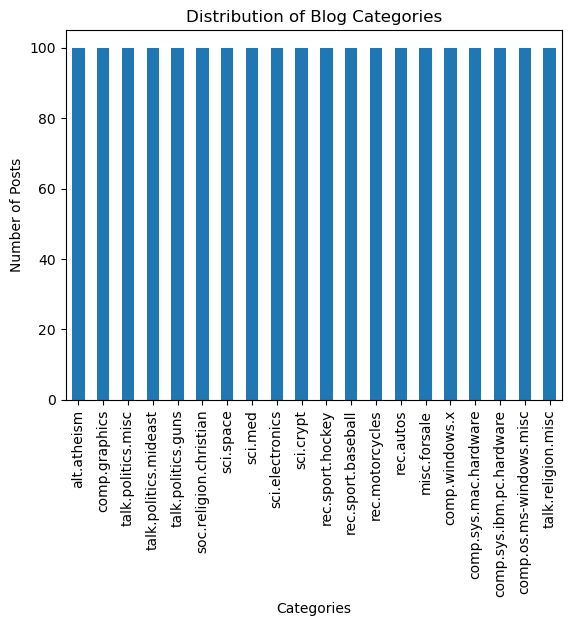

In [27]:
# Visualize the distribution of categories
import matplotlib.pyplot as plt
df['Labels'].value_counts().plot(kind='bar')
plt.title("Distribution of Blog Categories")
plt.xlabel("Categories")
plt.ylabel("Number of Posts")
plt.show()

In [28]:
# Check average text length
df['text_length'] = df['Data'].apply(len)
df['text_length'].describe()


count     2000.000000
mean      2324.978000
std       3590.560226
min        425.000000
25%       1147.000000
50%       1605.500000
75%       2374.500000
max      62290.000000
Name: text_length, dtype: float64

In [29]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



In [30]:
# Download NLTK stopwords if not already done
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)



In [32]:
# Apply preprocessing to the Data column
df['cleaned_text'] = df['Data'].apply(preprocess_text)


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

In [35]:
# Transform the cleaned text into TF-IDF features
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['Labels']

## Step 2. Naive Bayes Model for Text Classification

In [36]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)


MultinomialNB()

In [38]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = nb_model.predict(X_test)



In [39]:
# Calculate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))




Accuracy: 0.8225


In [40]:
# Classification report for precision, recall, F1-score
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.88      0.88      0.88        17
         

## Step 3. Sentiment Analysis

In [41]:
from nltk.sentiment import SentimentIntensityAnalyzer



In [42]:
# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()



In [43]:
# Function to determine sentiment (positive, negative, neutral)
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'



In [44]:
# Apply sentiment analysis to the cleaned text
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)


In [45]:
df['sentiment'].value_counts()

positive    1356
negative     581
neutral       63
Name: sentiment, dtype: int64

In [46]:
# Sentiment distribution across categories
sentiment_by_category = df.groupby('Labels')['sentiment'].value_counts().unstack().fillna(0)
print(sentiment_by_category)


sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   40.0      1.0      59.0
comp.graphics                 10.0      3.0      87.0
comp.os.ms-windows.misc       22.0      2.0      76.0
comp.sys.ibm.pc.hardware      18.0      3.0      79.0
comp.sys.mac.hardware         17.0      4.0      79.0
comp.windows.x                21.0      2.0      77.0
misc.forsale                   8.0     10.0      82.0
rec.autos                     26.0      3.0      71.0
rec.motorcycles               32.0      1.0      67.0
rec.sport.baseball            24.0      3.0      73.0
rec.sport.hockey              28.0      3.0      69.0
sci.crypt                     22.0      2.0      76.0
sci.electronics               13.0      6.0      81.0
sci.med                       28.0      2.0      70.0
sci.space                     28.0      5.0      67.0
soc.religion.christian        27.0      1.0      72.0
talk.politics.guns          

## Step 4. Evaluation

In [47]:
# Average sentiment scores for each category
sentiment_scores = df.groupby('Labels')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
print(sentiment_scores)


sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   0.40     0.01      0.59
comp.graphics                 0.10     0.03      0.87
comp.os.ms-windows.misc       0.22     0.02      0.76
comp.sys.ibm.pc.hardware      0.18     0.03      0.79
comp.sys.mac.hardware         0.17     0.04      0.79
comp.windows.x                0.21     0.02      0.77
misc.forsale                  0.08     0.10      0.82
rec.autos                     0.26     0.03      0.71
rec.motorcycles               0.32     0.01      0.67
rec.sport.baseball            0.24     0.03      0.73
rec.sport.hockey              0.28     0.03      0.69
sci.crypt                     0.22     0.02      0.76
sci.electronics               0.13     0.06      0.81
sci.med                       0.28     0.02      0.70
sci.space                     0.28     0.05      0.67
soc.religion.christian        0.27     0.01      0.72
talk.politics.guns          

# Conclusion


**Naive Bayes Performance:** You should discuss the accuracy, precision, recall, and F1-score results in the context of the classification task. If the model is performing poorly, consider tuning the hyperparameters of the Naive Bayes model or using additional features.


**Sentiment Analysis Insights:** Summarize how the sentiment distribution relates to the blog categories. Are certain categories more likely to express positive or negative sentiments?